# Estatística Aplicada com Python
## Carlos Góes (andregoes@gmail.com)

# 2. Representação de dados em tabelas: introdução ao Pandas

### 2.1. O que são tabelas e DataFrames

**Dados** são coleções de observações específicas sobre indivíduos, domicílio, países, máquinas, fábricas, etc. Um método típico de armazenamento de dados em pacotes como o *python* é listar as características de cada uma dessas unidades, armazenando-as em **variáveis** que descrevem características sobre esses indivíduos.

In [1]:
dados =    {'Domicílio 1':
                            {
                            'UF': 'DF',
                            'Município': 'Brasília',
                            'Número de habitantes': 3,
                            'Número de cômodos': 2,
                            'Tem geladeira': True,
                            'Tem TV a Cores': True,
                            'Tem máquina de lavar': True,
                            'Renda familiar habitual no mês (R$)': 18000.00,
                            },
            'Domicílio 2':
                            {
                            'UF': 'MA',
                            'Município': 'São Luís',
                            'Número de habitantes': 5,
                            'Número de cômodos': 2,
                            'Tem geladeira': True,
                            'Tem TV a Cores': True,
                            'Tem máquina de lavar': False,
                            'Renda familiar habitual no mês (R$)': 2000.00,
                            }
            }

print("Domicílio 1: \n", dados['Domicílio 1'], "\n\n", "Domicílio 2: \n", dados['Domicílio 2'])

Domicílio 1: 
 {'UF': 'DF', 'Município': 'Brasília', 'Número de habitantes': 3, 'Número de cômodos': 2, 'Tem geladeira': True, 'Tem TV a Cores': True, 'Tem máquina de lavar': True, 'Renda familiar habitual no mês (R$)': 18000.0} 

 Domicílio 2: 
 {'UF': 'MA', 'Município': 'São Luís', 'Número de habitantes': 5, 'Número de cômodos': 2, 'Tem geladeira': True, 'Tem TV a Cores': True, 'Tem máquina de lavar': False, 'Renda familiar habitual no mês (R$)': 2000.0}


Você consegue entender o que esses dados transmitem. Mas essa é uma forma muito pouco amigável de acessar dados para qualquer um que não seja um computador. Por isso, tanto no seu dia-a-dia quanto no uso de softwares estatísticos, você vai se acostumar a organizar dados em **tabelas** ou **DataFrames**. 

*Mas o que são esses DataFrames?*

**DataFrames são métodos de organizar dados em tabelas**. Eles são, em essência, matrizes em que *cada linha denota uma observação diferente* (por exemplo, para domicílios diferentes, como no nosso exemplo acima) e *cada coluna denota uma variável* (uma característica para aquela observação específica).

Pense em como o Censo era realizado antes de existirem computadores. Primeiramente, um entrevistador ia a muitas casas diferentes e anotava as características das pessoas que viviam nessas casas. Depois, alguém tinha que organizar esses formulários de entrevistas. Esse alguém fazia isso criando uma tabela identificando cada indivíduo (numa linha) e suas respectivas características (em colunas). Por fim, estatísticos utilizavam esses dados para criar tabelas com estatísticas descritivas, identificar tendências e observar correlações. 

Uma tabela típica se vê como na figura abaixo.

<img src="https://github.com/omercadopopular/cgoes/raw/master/StatsPython/figs/2tab1.png">

Note que há uma coluna, destacada em cinza, que é o indexador individual. O número nessa coluna identifica diferentes observações (neste caso, diferentes estudantes). A sua direita estão as colunas que descrevem as características dos estudantes.

Para você entender como ler essa tabela, tente primeiro deslizar seu dedo verticalmente na coluna com os índices e depois mover seu dedo para a direita para ver quais são as características daquele estudante. Com este método, você vai perceber que o estudante número 3 é do sexo masculino, cursa Química e tem índice de rendimento acadêmico 2,6 (numa escala que vai de 0 a 4).

Tabelas (DataFrames) são uma ferramente central na análise estatística. Primeiro um cientista de dados organiza seus dados em uma tabela, depois ele faz ajustes para "limpar" problemas em seus dados (como valores incorretos ou faltantes) e, finalmente, e pode fazer alguma análise formal utilizando técnicas de estatística descritiva ou econometria. Em estatística aplicada, saber os procedimentos de manutenção e limpeza de dados é tão importante quanto saber como rodar regressões. Se seus dados são de qualidade ruim, seus resultados também o serão - não importa o seu conhecimento técnico em estatística.

## 2.2 Conceitos Fundamentais e Notação

Tabelas devem organizar informações específicas sobre indivíduos. Imagine que temos informações sobre $N$ indivíduos. O conjunto de indivíduos, portanto, é:

$
            \begin{equation}
                I = \{ 1, 2, ..., N\}
            \end{equation}
$

Imagine também que temos organizamos as informações em duas variáveis, sua renda ($r$) e a cidade  ($c$) onde ela/e mora. cada variável corresponde ao um indivíduo específico (que chamamos genericamente de indivíduo $i$), usamos um subscripto para identificá-lo: $c_i$ é a cidade em que o indivíduo $i$ mora e $r_i$ sua renda. Os conjuntos de renda ($r$) e cidade ($c$), portanto, são:

$
            \begin{eqnarray}
                r &=& \{ r_1, r_2, ..., r_N\} \\
                c &=& \{ c_1, c_2, ..., c_N\}
            \end{eqnarray}
$

Note que há pelo menos duas maneiras de organizar o universo de dados:

- Dados organizados por variáveis:

<img src="https://github.com/omercadopopular/cgoes/raw/master/StatsPython/figs/dados1.png">


- Dados organizados por indivíduos
<img src="https://github.com/omercadopopular/cgoes/raw/master/StatsPython/figs/dados2.png">

Há três tipos básicos de organização de dados sobre indivíduos:

- Organização de dados sobre **indivíduos diferentes** no **mesmo período no tempo** (*corte transversal* ou *cross-section*).
- Organização de dados sobre **um só indivíduo** no **em períodos diferentes** (*séries temporais* ou *time series*).
- Organização de dados sobre **os mesmos indivíduos** no **em períodos diferentes** (*dados em paineis* ou *panel data*).

### 1.2.1 Organização de dados sobre **indivíduos diferentes** no **mesmo período no tempo** (*corte transversal* ou *cross-section*).

Variáveis diferentes relativos a $N$ indivíduos diferentes $[1, 2, ..., N]'$ :

- Variável $x$: $\{ x_1 , x_2 , ... , x_N \}$
- Variável $y$: $\{ y_1 , y_2 , ... , y_N \}$
- Indivíduo $i$: $x_i, y_i$
    
<img src="https://github.com/omercadopopular/cgoes/raw/master/StatsPython/figs/cross-section.png">

### 2.2.2 Organização de dados sobre **um só indivíduo** no **em períodos diferentes** (*séries temporais* ou *time series*).

Variáveis diferentes relativos a um só indivíduo para $T$ períodos diferentes $[1, 2, ..., T]'$ :

- Variável $x$: $\{ x_1 , x_2 , ... , x_T \}$
- Variável $y$: $\{ y_1 , y_2 , ... , y_T \}$
- Período $t$: $x_t, y_t$

<img src="https://github.com/omercadopopular/cgoes/raw/master/StatsPython/figs/timeseries.png">

### 2.2.3 Organização de dados sobre **os mesmos indivíduos** no **em períodos diferentes** (*dados em paineis* ou *panel data*).

 Variáveis diferentes relativos $N$ indivíduos $[1, 2, ..., N]'$  para $T$ períodos diferentes $[1, 2, ..., T]'$ :
 
- Variável $x$ no período $1$: $\{ x_{1,1} , x_{2,1} , ... , x_{N,1} \}$
- Variável $x$ no período $2$: $\{ x_{1,2} , x_{2,2} , ... , x_{N,2} \}$
- $\vdots$
- Variável $x$ no período $T$: $\{ x_{1,T} , x_{2,T} , ... , x_{N,T} \}$
- Representação da observação da variável $x$ para o indivíduo $i$ no período $t$: $x_{i,t}$

<img src="https://github.com/omercadopopular/cgoes/raw/master/StatsPython/figs/panel.png">

## 2.3 Estatísticas Descritivas
### 2.3.1 Média

Você já sabe o que é uma média:

$            
            \begin{equation}
                média = \frac{soma \quad das \quad observações}{total \quad de \quad observações}
            \end{equation}
$           

Mas vamos entender um pouco mais da notação de médias? A média (ou *valor esperado*) da variável $x$, que tem $N$ observações, se define por:

$           
            \begin{equation}
                E[x] = \bar{x} = \frac{x_1 + ... + x_n}{N} = \frac{ \sum_{i=1}^N x_i}{N}
            \end{equation}
$          

Por exemplo, tome a seguinte amostra:

$            
            \begin{equation}
                x = \{1 , 4 , 8 , 9 , 12 , 15 , 20\}
            \end{equation}
$            

Qual é a média dessa amostra?

$
            \begin{eqnarray}
                \bar{x} &=& \frac{ \sum_{i=1}^N x_i}{N} = \frac{ 1 + 4 + 8 + 9 + 12 + 15 + 20}{7} \\
                \bar{x} &\approx& 9,85 \nonumber
            \end{eqnarray}
$           

Vamos aplicar esse conceito no python. Primeiro, declare a seguinte variável como uma lista.

In [2]:
x = [1, 4, 8, 9, 12, 15, 20]

x

[1, 4, 8, 9, 12, 15, 20]

Vamos agora criar uma função para calcular a média dessa amostra:

In [3]:
def media(amostra):
    numerador = sum(amostra)
    denominador = len(amostra)
    return numerador / denominador

E aplicar essa função a $x$:

In [4]:
media(x)

9.857142857142858

Podemos também utilizar os extensões que trazem funções adicionais para Python.

Primeiro, temos que importar a(s) bibliotecas(s):

In [5]:
import scipy
import numpy as np

Depois, chamar o pacote e aplicá-lo a $x$:

In [6]:
scipy.mean(x)

9.8571428571428577

In [7]:
np.mean(x)

9.8571428571428577

### 2.3.2 Mediana

Ao contrário da média, a mediana é o valor que está no meio da distribuição. A mediana é o valor que divide a amostra ao meio: 50% está acima desse valor e 50% está abaixo dele. Por exemplo, em $x$:

$            
            \begin{equation}
                x = \{1 , 4 , 8 , 9 , 12 , 15 , 20\}
            \end{equation}
$

Qual a mediana de $x$?
- $9$

E em $y$, qual é a mediana?

$                
            \begin{equation}
                y = \{1 , 4 , 8 , 9 , 11 , 12 , 15 , 20\}
            \end{equation}
$

Resposta: a média de $9$ e $11$: $10$.

Vamos aplicar no python?

Primeiro, temos que importar a biblioteca:

In [8]:
import numpy as np

Depois, chamar o pacote e aplicá-lo a $x$:

In [9]:
np.median(x)

9.0

Escrever nosso próprio programa é um pouquinho mais complicado, mas possível:

In [10]:
def mediana(amostra):
    amostra_ordenada = sorted(amostra)
    resto = len(amostra_ordenada) % 2
    
    if (resto == 0):
        metade = len(amostra_ordenada) / 2
        n1 = int(metade - 0.5)
        n2 = int(metade + 0.5)
        return (amostra_ordenada[n1] + amostra_ordenada[n2]) / 2
    
    else:
        metade = int(len(amostra_ordenada) / 2)
        return amostra_ordenada[metade]

In [11]:
mediana(x)

9

Como sabemos quando usar médias e medianas? Imagine essas duas amostras diferentes:

$
            \begin{eqnarray}
                x &=& [1,1,1,1,1,19]  \\
                y &=& [4,4,4,4,4,4]
            \end{eqnarray}          
$

Quais são as médias dessas duas distribuições?

$
            \begin{eqnarray}
                \bar{x} &=& \frac{\sum_{i=1}^{N_x} x_i}{N_x} = \frac{5 \cdot 1 + 19}{6} = \frac{24}{6} = 4  \\
                \bar{y} &=& \frac{\sum_{i=1}^{N_y} y_i}{N_y} = \frac{6 \cdot 4}{6} = 4
            \end{eqnarray}
$           

$\bar{x} = \bar{y}$, mas, obviamente, essas amostras são bem diferentes. É importante entender, portando, que **quando a distribuição é desigual, médias enganam.**

### 2.3.3 Quantis

P: Quando faz sentido resumir um conjunto de dados por um único número?
R: Muito raramente!

P: Qual a solução?
R: Fazer cálculo de quantis.

P: O que são quantis?
R: Quantis são indicadores similares à mediana, mas que fazem cortes em outras partes da amostra.

Os quantis mais comuns são *quartis* e *pecentis*

Em **quartis**, divide-se a amostra em **quatro partes com o mesmo número de observações**. Tome a amostra abaixo.

$
            \begin{equation}
                y = \{1 , 4 , 8 , 9 , 11 , 12 , 16 , 20\}
            \end{equation}
$

- Primeiro, encontra-se a mediana: $9+11 / 2 = 10$.
- Depois, encontra a mediana dos dois grupos que estão acima e abaixo da mediana calculada.
- A mediana da metade inferior, também chamado de *primeiro quartil* é $4+8/2 = 6$
- A mediana da metade inferior, também chamado de *terceiro quartil* é $12+16/2 = 14$

Portanto, dada a amostra $y$:

| Quartil | Valor | Percentual da amostra $\leq$ valor |
|---------|-------|------------------------------------|
| Primeiro (Q1) | 6 | 25% |
| Segundo  (Q2 = mediana) | 10 | 50% |
| Terceiro (Q3) | 14 | 75% |
| Terceiro (Q4) | 20 | 100% |

Exemplo de utilização de quartis:

[figura]

O **intervalo interquartil ($IQR$)** são os 50% da amostra que estão entre o primeiro ($Q1$) e o terceiro ($Q3$) quartis. Ele pode ser utilizado para dar uma dimensão de qual é a distribuição para o leitor:

[figura]

**Percentis** são como quartis, mas **dividem a amostra em 100 partes**! Exemplo de utilização de percentis:

[figura]

## 2.4 Introdução ao pandas

O pandas é uma das principais ferramentas de trabalho de um cientista de dados que utiliza python. Ele traz duas estruturas básicas:

- Series; e
- DataFrames, sendo que DataFrames são coleções de Series.

A primeira coisa que precisamos fazer (depois de instalar o pandas) é importar a biblioteca:

In [12]:
import pandas as pd

### 2.4.1 Séries

**Series** podem ser construídas a partir de outros objetos:

In [13]:
x = np.linspace(1,10, 5)
rotulo = ["a","b","c","d","e"]
serie1 = pd.Series(x, name="Série1", index=rotulo)

serie1

a     1.00
b     3.25
c     5.50
d     7.75
e    10.00
Name: Série1, dtype: float64

Como *lists*, você pode acessar um elemento de uma *Serie* utilizando seu indexador:

In [14]:
print(serie1["a"])
print(serie1["d"])

1.0
7.75


Se você construir **Series** a partir de **dictionaries**, o pandas utiliza a chave dos dicionários como indexadores:

In [15]:
matricula  = {
            'Carlos Goes': '06/99209',
            "Nicolas Powidayko": '10/22290',
            "Alexander Rabbat": '08/21346',
            "Dani Alaino": '07/20345',
            "Lya Nikate": '09/23567',
            "Niz Borroz": '11/22035',
            "Tom Rundal": "98/20145"
            }

matricula = pd.Series(matricula)

matricula

Alexander Rabbat     08/21346
Carlos Goes          06/99209
Dani Alaino          07/20345
Lya Nikate           09/23567
Nicolas Powidayko    10/22290
Niz Borroz           11/22035
Tom Rundal           98/20145
dtype: object

Você pode usar .loc ou colchetes para retornar os valores de cada indexador:

In [16]:
matricula.loc['Carlos Goes']

'06/99209'

In [17]:
matricula['Carlos Goes']

'06/99209'

Ou utilizar .iloc para retornar o indexador número, como se você estivesse trabalhando com listas:

In [18]:
matricula.iloc[1]

'06/99209'

Abaixo, nós criamos duas outras séries. Note que estamos criando as séries diretamente, colocando as chaves dos dicionários dentro dos parênteses: 

In [19]:
curso = pd.Series({
        'Carlos Goes': 'Economia',
        "Nicolas Powidayko": 'Economia',
        "Alexander Rabbat": 'Relações Internacionais',
        "Dani Alaino": 'Relações Internacionais',
        "Lya Nikate": 'Relações Internacionais',
        "Niz Borroz": 'Relações Internacionais',
        "Tom Rundal": "Economia"
        })

curso

Alexander Rabbat     Relações Internacionais
Carlos Goes                         Economia
Dani Alaino          Relações Internacionais
Lya Nikate           Relações Internacionais
Nicolas Powidayko                   Economia
Niz Borroz           Relações Internacionais
Tom Rundal                          Economia
dtype: object

In [20]:
ira = pd.Series({
    'Carlos Goes': 5.0,
    "Nicolas Powidayko": 4.8,
    "Alexander Rabbat": 3.8,
    "Dani Alaino": 4.4,
    "Lya Nikate": 4.3,
    "Niz Borroz": 4.0,
    "Tom Rundal": 4.0
    })


ira

Alexander Rabbat     3.8
Carlos Goes          5.0
Dani Alaino          4.4
Lya Nikate           4.3
Nicolas Powidayko    4.8
Niz Borroz           4.0
Tom Rundal           4.0
dtype: float64

### 2.4.2 DataFrames

Nós criamos três Series e, como você deve ter percebido, essas séries armazenam informações referentes a diferentes estudantes: suas matrículas, IRAs e cursos. Essas Series parecem ser o tipo de dados que podemos armazenar em tabelas. 

O pandas permite que nós juntemos essas Series facilmente. Nós podemos chamar a função .DataFrame da biblioteca pandas e listar as distintas séries como nossos dados. O resultado final será uma tabela propriamente indexada.

In [21]:
data = [matricula, curso, ira]

df = pd.DataFrame(data, index=['matricula','curso','ira'])

df

,Alexander Rabbat,Carlos Goes,Dani Alaino,Lya Nikate,Nicolas Powidayko,Niz Borroz,Tom Rundal
matricula,08/21346,06/99209,07/20345,09/23567,10/22290,11/22035,98/20145
curso,Relações Internacionais,Economia,Relações Internacionais,Relações Internacionais,Economia,Relações Internacionais,Economia
ira,3.8,5,4.4,4.3,4.8,4,4


Interessante. Mas será que há uma forma melhor de organizar esses dados. E se nós preferíssimos que os nomes dos indivíduos fossem os indexadores? Sem problema, podemos chamar a função .T para transpor nosso DataFrame.

In [22]:
df = df.T
df

,matricula,curso,ira
Alexander Rabbat,08/21346,Relações Internacionais,3.8
Carlos Goes,06/99209,Economia,5
Dani Alaino,07/20345,Relações Internacionais,4.4
Lya Nikate,09/23567,Relações Internacionais,4.3
Nicolas Powidayko,10/22290,Economia,4.8
Niz Borroz,11/22035,Relações Internacionais,4
Tom Rundal,98/20145,Economia,4


Como extrair os atributos de Carlos Goes?

In [23]:
df.loc["Carlos Goes"]

matricula    06/99209
curso        Economia
ira                 5
Name: Carlos Goes, dtype: object

Como extrair a matrícula de Carlos Goes?

In [24]:
df.loc["Carlos Goes"]["matricula"]

'06/99209'

Como extrair todas as matrículas?

In [25]:
df["matricula"]

Alexander Rabbat     08/21346
Carlos Goes          06/99209
Dani Alaino          07/20345
Lya Nikate           09/23567
Nicolas Powidayko    10/22290
Niz Borroz           11/22035
Tom Rundal           98/20145
Name: matricula, dtype: object

Como extrair as matrículas de Lya Nikate e Dani Alaino?

In [26]:
df["matricula"][['Lya Nikate','Dani Alaino']]

Lya Nikate     09/23567
Dani Alaino    07/20345
Name: matricula, dtype: object

Como extrair os dados de todos os estudantes de Economia?

- Boolean masking!

Primeiro veja o que acontece se nós usarmos uma operação lógica sobre nosso DataFrame:

In [27]:
df["curso"] == "Economia"

Alexander Rabbat     False
Carlos Goes           True
Dani Alaino          False
Lya Nikate           False
Nicolas Powidayko     True
Niz Borroz           False
Tom Rundal            True
Name: curso, dtype: bool

O retornado é uma série de condições de verdadeiro e falso para cada um dos indivíduos. Se nós incluírmos essa condição dentro de nosso DataFrame, o resultado será um novo DataFrame incluindo somente os indivíduos que atendem àquela condição lógica:

In [28]:
df[ df["curso"] == "Economia" ]

,matricula,curso,ira
Carlos Goes,06/99209,Economia,5
Nicolas Powidayko,10/22290,Economia,4.8
Tom Rundal,98/20145,Economia,4


Vamos exemplificar outras operações abaixo...? E se quisermos só os estudantes com IRA menor ou igual a três?

In [29]:
df[df['ira'] <= 4]

,matricula,curso,ira
Alexander Rabbat,08/21346,Relações Internacionais,3.8
Niz Borroz,11/22035,Relações Internacionais,4
Tom Rundal,98/20145,Economia,4


Ou alterar os IRAs multiplicando todos eles por dois?

In [30]:
df['ira'] *= 2
df

,matricula,curso,ira
Alexander Rabbat,08/21346,Relações Internacionais,7.6
Carlos Goes,06/99209,Economia,10
Dani Alaino,07/20345,Relações Internacionais,8.8
Lya Nikate,09/23567,Relações Internacionais,8.6
Nicolas Powidayko,10/22290,Economia,9.6
Niz Borroz,11/22035,Relações Internacionais,8
Tom Rundal,98/20145,Economia,8


Ooops. Era um erro. Como dividir todos eles por dois?

In [31]:
df['ira'] /= 2
df

,matricula,curso,ira
Alexander Rabbat,08/21346,Relações Internacionais,3.8
Carlos Goes,06/99209,Economia,5
Dani Alaino,07/20345,Relações Internacionais,4.4
Lya Nikate,09/23567,Relações Internacionais,4.3
Nicolas Powidayko,10/22290,Economia,4.8
Niz Borroz,11/22035,Relações Internacionais,4
Tom Rundal,98/20145,Economia,4


Podemos calcular estatísticas extraindo Series específicas - e inclusive utilizar pacotes para isso!

In [32]:
ira_media = np.sum(df['ira'])/len(df['ira'])
ira_media

4.328571428571428

In [33]:
ira_media = np.mean(df['ira'])
ira_media

4.3285714285714283

Também é fácil remover ou adicionar um indivíduo do nosso DataFrame

In [34]:
df = df.drop('Carlos Goes')
df

,matricula,curso,ira
Alexander Rabbat,08/21346,Relações Internacionais,3.8
Dani Alaino,07/20345,Relações Internacionais,4.4
Lya Nikate,09/23567,Relações Internacionais,4.3
Nicolas Powidayko,10/22290,Economia,4.8
Niz Borroz,11/22035,Relações Internacionais,4
Tom Rundal,98/20145,Economia,4


In [35]:
df = df.append(
        pd.Series(
                data = { 'curso': 'Economia',
                        'matricula': '06/99209',
                        'ira': 5.0  },
                name=('Carlos Goes')
                )
            )

df

,matricula,curso,ira
Alexander Rabbat,08/21346,Relações Internacionais,3.8
Dani Alaino,07/20345,Relações Internacionais,4.4
Lya Nikate,09/23567,Relações Internacionais,4.3
Nicolas Powidayko,10/22290,Economia,4.8
Niz Borroz,11/22035,Relações Internacionais,4
Tom Rundal,98/20145,Economia,4
Carlos Goes,06/99209,Economia,5


Se criarmos uma nova tabela que parcialmente se justapõe a nossa tabela original, podemos mescla-las

In [36]:
names = ['Carlos Goes', 
        "Nicolas Powidayko",
        "Nick Borroz",
        "Michel Tomer",
        "Dilm Rusef"]

extracurricular = pd.DataFrame([
        {'Modelo da ONU': True, 'Monitor': True, "Lista de Honra": True},
        {'Modelo da ONU': False, 'Monitor': False, "Lista de Honra": True},
        {'Modelo da ONU': True, 'Monitor': True, "Lista de Honra": False},
        {'Modelo da ONU': True, 'Monitor': True, "Lista de Honra": True},
        {'Modelo da ONU': True, 'Monitor': True, "Lista de Honra": True},
        ], index=names)

extracurricular

,Lista de Honra,Modelo da ONU,Monitor
Carlos Goes,True,True,True
Nicolas Powidayko,True,False,False
Nick Borroz,False,True,True
Michel Tomer,True,True,True
Dilm Rusef,True,True,True


Seja incluindo somente os indivíduos presentes nas duas tabelas (inner):

In [37]:
inner = pd.merge(df, extracurricular,
                  left_index=True, right_index=True, how='inner')
inner

,matricula,curso,ira,Lista de Honra,Modelo da ONU,Monitor
Nicolas Powidayko,10/22290,Economia,4.8,True,False,False
Carlos Goes,06/99209,Economia,5,True,True,True


Incluindo todos os indivíduos, deixando vazios os dados faltantes:

In [38]:
outer = pd.merge(df, extracurricular,
                  left_index=True, right_index=True, how='outer')
outer

,matricula,curso,ira,Lista de Honra,Modelo da ONU,Monitor
Alexander Rabbat,08/21346,Relações Internacionais,3.8,NaN,NaN,NaN
Carlos Goes,06/99209,Economia,5,True,True,True
Dani Alaino,07/20345,Relações Internacionais,4.4,NaN,NaN,NaN
Dilm Rusef,NaN,NaN,NaN,True,True,True
Lya Nikate,09/23567,Relações Internacionais,4.3,NaN,NaN,NaN
Michel Tomer,NaN,NaN,NaN,True,True,True
Nick Borroz,NaN,NaN,NaN,False,True,True
Nicolas Powidayko,10/22290,Economia,4.8,True,False,False
Niz Borroz,11/22035,Relações Internacionais,4,NaN,NaN,NaN
Tom Rundal,98/20145,Economia,4,NaN,NaN,NaN


Tomando como base a tabela da esquerda:

In [39]:
left = pd.merge(df, extracurricular,
                  left_index=True, right_index=True, how='left')
left

,matricula,curso,ira,Lista de Honra,Modelo da ONU,Monitor
Alexander Rabbat,08/21346,Relações Internacionais,3.8,NaN,NaN,NaN
Dani Alaino,07/20345,Relações Internacionais,4.4,NaN,NaN,NaN
Lya Nikate,09/23567,Relações Internacionais,4.3,NaN,NaN,NaN
Nicolas Powidayko,10/22290,Economia,4.8,True,False,False
Niz Borroz,11/22035,Relações Internacionais,4,NaN,NaN,NaN
Tom Rundal,98/20145,Economia,4,NaN,NaN,NaN
Carlos Goes,06/99209,Economia,5,True,True,True


Ou da direita:

In [40]:
right = pd.merge(df, extracurricular,
                  left_index=True, right_index=True, how='right')
right

,matricula,curso,ira,Lista de Honra,Modelo da ONU,Monitor
Carlos Goes,06/99209,Economia,5,True,True,True
Nicolas Powidayko,10/22290,Economia,4.8,True,False,False
Nick Borroz,NaN,NaN,NaN,False,True,True
Michel Tomer,NaN,NaN,NaN,True,True,True
Dilm Rusef,NaN,NaN,NaN,True,True,True


Podemos também preencher todos os dados que estejam faltando com um valor específico:

In [41]:
left = left.fillna(False)
left

,matricula,curso,ira,Lista de Honra,Modelo da ONU,Monitor
Alexander Rabbat,08/21346,Relações Internacionais,3.8,False,False,False
Dani Alaino,07/20345,Relações Internacionais,4.4,False,False,False
Lya Nikate,09/23567,Relações Internacionais,4.3,False,False,False
Nicolas Powidayko,10/22290,Economia,4.8,True,False,False
Niz Borroz,11/22035,Relações Internacionais,4.0,False,False,False
Tom Rundal,98/20145,Economia,4.0,False,False,False
Carlos Goes,06/99209,Economia,5.0,True,True,True


### 2.4.3 Como importar um arquivo?

Resposta: depende do tipo de arquivo que você está importando. 

Tipos de arquivo:

- *Planilha*: .xls, .xlsx, etc.
- *Texto*: .txt, .csv, .tsv, etc.
- *Json* ou *SQL*: .json, .sql
- Outros...

Aqui nós vamos trabalhar com um arquivo de texto, que é bem comum na análise de dados. Visite esse website e veja como os dados estão organizados: https://raw.githubusercontent.com/omercadopopular/cgoes/master/piketty/fdatabasetax.csv. 

Agora vamos importá-lo:

In [42]:
url = "https://raw.githubusercontent.com/" +      \
    "omercadopopular/cgoes/master/piketty/" +   \
    "fdatabasetax.csv"
                
piketty = pd.read_csv(url)
piketty

,country,year,top10,top5,top1,short,tshort,long,tlong,deflator,...,growth,rg1,rg2,rg3,rg4,rg5,ctxrate,kshare,rimp,delta
0,Australia,1980,25.39,15.31,4.79,10.667500,NaN,11.651666,NaN,9.799431,...,2.893709,-2.025640,-1.041474,NaN,NaN,NaN,NaN,22.781307,7.143823,4.372757
1,Australia,1981,25.31,15.15,4.61,13.250833,7.155450,13.987500,7.553250,10.112331,...,4.127127,-0.988626,-0.251958,-10.375515,-10.160703,-4.548147,46.0000,22.992748,7.116895,4.264144
2,Australia,1982,25.82,15.44,4.67,14.642497,7.906948,15.345829,8.286748,12.080141,...,0.062726,2.499629,3.202961,-7.873116,-7.668024,-0.387324,46.0000,24.848551,7.272948,4.251989
3,Australia,1983,25.32,15.16,4.68,12.225000,6.601500,14.112500,7.620750,8.696501,...,-0.473595,4.002095,5.889595,-4.658095,-4.107700,0.526811,46.0000,26.956326,7.994036,4.263564
4,Australia,1984,25.50,15.25,4.75,10.985000,5.931900,13.833333,7.470000,5.962292,...,6.346048,-1.323340,1.524993,-9.105114,-8.274540,-6.093940,46.0000,27.437305,8.234032,4.194270
5,Australia,1985,25.93,15.63,5.02,15.336663,8.281798,14.104165,7.616249,5.280455,...,5.456397,4.599811,3.367313,-6.264681,-6.624078,-5.167578,46.0000,27.803844,8.398011,4.246107
6,Australia,1986,26.61,16.17,5.39,15.386665,7.847199,13.558331,6.914749,6.111641,...,2.448094,6.826930,4.998596,-4.557664,-5.033214,-2.377699,49.0000,29.045123,8.697203,4.365178
7,Australia,1987,28.66,17.94,6.67,12.798332,6.527149,13.466667,6.868000,7.158711,...,4.892633,0.746989,1.415324,-8.722497,-8.548663,-4.428184,49.0000,30.865788,9.409619,4.334457
8,Australia,1988,30.28,19.84,8.41,15.400000,9.394000,12.950000,7.899500,9.068585,...,4.253262,2.078153,-0.371847,-7.591507,-8.503152,-2.752238,39.0000,30.706412,9.332893,4.192040
9,Australia,1989,27.64,17.46,6.43,17.550000,10.705500,12.900000,7.869000,7.498348,...,4.569199,5.482453,0.832453,-5.537192,-7.267457,-1.403170,39.0000,39.471942,11.967970,4.134433


### 2.4.4 Como extrair estatísticas descritivas de um DataFrame?

Vamos criar um novo dataframe com o resultado de média, mediana e quartis para o DataFrame "piketty", que criamos acima:

In [43]:
estd = pd.DataFrame([piketty.mean(),
    piketty.min(),
    piketty.quantile(0.25),
    piketty.median(),
    piketty.quantile(0.75),
    piketty.max()],
                                         
    index=['média', 'min',
    'Q1', 'mediana',
    'Q3', 'max'])
                     
estd.T

,média,min,Q1,mediana,Q3,max
country,NaN,Australia,NaN,NaN,NaN,United States
ctxrate,36.4503,12.5,29.1,35,43,61.75
deflator,4.12754,-5.20482,1.58637,3.0291,5.45106,30.4936
delta,4.1522,3.16318,3.78479,4.07658,4.53323,5.20929
fiscal,-462.9,-212645,-32.4682,-5.71741,24.2831,4338.03
growth,2.94515,-8.26904,1.47175,2.78642,4.27581,15.2404
kshare,39.4074,22.7813,34.5579,37.8713,44.4646,59.7889
long,7.47639,0.843333,4.49106,6.31208,10.2481,21.5025
rg1,-0.998129,-23.7701,-2.77191,-0.366904,2.0767,17.5954
rg2,0.132303,-23.7701,-1.70644,0.751902,2.87375,16.3973


Ou simplesmente utilizar .describe()

In [44]:
piketty.describe().T

,count,mean,std,min,25%,50%,75%,max
year,580.0,1994.982759,9.051553,1980.000000,1987.000000,1995.000000,2003.000000,2012.000000
top10,526.0,32.832084,5.086220,21.830000,29.825000,32.420000,35.510000,48.160000
top5,506.0,21.716479,4.340658,13.170000,19.090000,21.391667,23.600000,35.760000
top1,536.0,8.710769,2.828413,3.490000,6.989145,8.392500,9.940000,19.340000
short,536.0,6.560030,4.661725,0.001000,3.018958,5.423375,9.687010,22.670000
tshort,523.0,3.844554,2.586911,0.000605,1.967362,3.329375,5.399175,13.433221
long,558.0,7.476393,4.012490,0.843333,4.491063,6.312083,10.248125,21.502500
tlong,544.0,4.455663,2.135030,0.592467,2.977018,3.929458,5.679240,12.367501
deflator,579.0,4.127542,4.382126,-5.204818,1.586370,3.029098,5.451060,30.493552
fiscal,429.0,-462.900038,10276.604264,-212645.042600,-32.468189,-5.717414,24.283090,4338.029262


Podemos limitar a amostra selecionando um país específico:

In [45]:
australia = piketty[ piketty['country'] == "Australia" ]
australia

,country,year,top10,top5,top1,short,tshort,long,tlong,deflator,...,growth,rg1,rg2,rg3,rg4,rg5,ctxrate,kshare,rimp,delta
0,Australia,1980,25.39,15.31,4.79,10.667500,NaN,11.651666,NaN,9.799431,...,2.893709,-2.025640,-1.041474,NaN,NaN,NaN,NaN,22.781307,7.143823,4.372757
1,Australia,1981,25.31,15.15,4.61,13.250833,7.155450,13.987500,7.553250,10.112331,...,4.127127,-0.988626,-0.251958,-10.375515,-10.160703,-4.548147,46.0,22.992748,7.116895,4.264144
2,Australia,1982,25.82,15.44,4.67,14.642497,7.906948,15.345829,8.286748,12.080141,...,0.062726,2.499629,3.202961,-7.873116,-7.668024,-0.387324,46.0,24.848551,7.272948,4.251989
3,Australia,1983,25.32,15.16,4.68,12.225000,6.601500,14.112500,7.620750,8.696501,...,-0.473595,4.002095,5.889595,-4.658095,-4.107700,0.526811,46.0,26.956326,7.994036,4.263564
4,Australia,1984,25.50,15.25,4.75,10.985000,5.931900,13.833333,7.470000,5.962292,...,6.346048,-1.323340,1.524993,-9.105114,-8.274540,-6.093940,46.0,27.437305,8.234032,4.194270
5,Australia,1985,25.93,15.63,5.02,15.336663,8.281798,14.104165,7.616249,5.280455,...,5.456397,4.599811,3.367313,-6.264681,-6.624078,-5.167578,46.0,27.803844,8.398011,4.246107
6,Australia,1986,26.61,16.17,5.39,15.386665,7.847199,13.558331,6.914749,6.111641,...,2.448094,6.826930,4.998596,-4.557664,-5.033214,-2.377699,49.0,29.045123,8.697203,4.365178
7,Australia,1987,28.66,17.94,6.67,12.798332,6.527149,13.466667,6.868000,7.158711,...,4.892633,0.746989,1.415324,-8.722497,-8.548663,-4.428184,49.0,30.865788,9.409619,4.334457
8,Australia,1988,30.28,19.84,8.41,15.400000,9.394000,12.950000,7.899500,9.068585,...,4.253262,2.078153,-0.371847,-7.591507,-8.503152,-2.752238,39.0,30.706412,9.332893,4.192040
9,Australia,1989,27.64,17.46,6.43,17.550000,10.705500,12.900000,7.869000,7.498348,...,4.569199,5.482453,0.832453,-5.537192,-7.267457,-1.403170,39.0,39.471942,11.967970,4.134433


Ou um ano específico:

In [46]:
y2000 = piketty[ piketty['year'] == 2000 ]
y2000

,country,year,top10,top5,top1,short,tshort,long,tlong,deflator,...,growth,rg1,rg2,rg3,rg4,rg5,ctxrate,kshare,rimp,delta
20,Australia,2000,31.28,20.980000,9.030000,6.130000,4.045800,5.460000,3.603600,4.322023,...,3.085010,-1.277032,-1.947032,-4.736804,-5.028656,1.058265,34.00,40.051138,12.406828,4.045232
51,Canada,2000,42.34,29.010000,13.560000,5.479167,3.154356,5.925833,3.411502,4.272401,...,5.123082,-3.916316,-3.469650,-7.579520,-7.431481,1.724614,42.43,42.027324,18.796513,3.973456
82,Finland,2000,32.17,21.821786,8.293964,4.390833,3.117492,5.483333,3.893167,1.630421,...,5.634923,-2.874510,-1.782010,-5.051925,-4.501195,-1.227834,29.00,41.942596,11.332386,3.638906
112,France,2000,33.05,21.650000,8.290000,4.390642,2.732735,5.394167,3.357329,1.543388,...,3.875162,-1.027908,-0.024383,-3.717695,-3.328948,-0.333721,37.76,37.158555,11.336139,3.514171
161,Ireland,2000,33.87,NaN,10.320000,NaN,NaN,5.478333,4.163533,6.418885,...,9.520972,-15.939858,-10.461524,NaN,-12.775572,22.279247,24.00,52.964234,47.026812,3.940158
191,Italy,2000,32.94,22.560000,9.090000,1.988333,1.252650,5.575167,3.512355,1.982081,...,3.693178,-3.686926,-0.100092,-4.886090,-3.462475,-0.033934,37.00,46.646464,12.365698,4.131145
221,Japan,2000,37.15,23.520000,8.220000,0.289333,0.171083,1.766521,1.044544,-1.247557,...,2.257473,-0.720583,0.756605,-0.908755,-0.392277,-0.355899,40.87,44.877821,10.812556,4.491889
252,Korea,2000,35.39,21.250000,8.190000,5.130914,3.550593,8.508382,5.887800,1.086836,...,8.924413,-4.880334,-1.502867,-7.554238,-5.936891,-3.008988,30.80,47.287315,15.072074,4.514450
285,Netherlands,2000,28.02,17.210000,5.610000,4.390642,2.853917,5.404167,3.512708,4.101888,...,4.382394,-4.093641,-3.080116,-6.629236,-6.201022,0.746085,35.00,37.370318,13.925210,3.922908
318,New Zealand,2000,31.19,20.430000,7.920000,6.627500,4.440425,6.700000,4.489000,2.164071,...,4.167813,0.295616,0.368116,-3.356799,-3.324254,5.987382,33.00,48.298222,21.670734,4.364197


Podemos utilizar indexadores:

In [47]:
piketty = (piketty
           .set_index(['country', 'year']))
piketty

top10   top5   top1      short     tshort       long  \
country       year                                                         
Australia     1980  25.39  15.31   4.79  10.667500        NaN  11.651666   
              1981  25.31  15.15   4.61  13.250833   7.155450  13.987500   
              1982  25.82  15.44   4.67  14.642497   7.906948  15.345829   
              1983  25.32  15.16   4.68  12.225000   6.601500  14.112500   
              1984  25.50  15.25   4.75  10.985000   5.931900  13.833333   
              1985  25.93  15.63   5.02  15.336663   8.281798  14.104165   
              1986  26.61  16.17   5.39  15.386665   7.847199  13.558331   
              1987  28.66  17.94   6.67  12.798332   6.527149  13.466667   
              1988  30.28  19.84   8.41  15.400000   9.394000  12.950000   
              1989  27.64  17.46   6.43  17.550000  10.705500  12.900000   
              1990  27.66  17.37   6.34  12.100000   7.381000  12.070000   
              1991  28.22  17.70   6.41   7.600000   4.636000   9.390000   
              1992  28.52  17.95   6.55   5.940000   3.623400   8.940000   
              1993  29.40  18.66   6.96   4.840000   3.242800   6.680000   
              1994  29.42  18.87   7.13   8.270000   5.540900  10.040000   
              1995  29.13  18.76   7.23   7.440000   4.761600   8.180000   
              1996  29.16  18.77   7.24   5.980000   3.827200   7.370000   
              1997  30.41  19.73   7.81   5.050000   3.232000   6.050000   
              1998  30.11  19.63   7.84   4.810000   3.078400   5.010000   
              1999  31.48  20.95   8.84   5.570000   3.564800   6.960000   
              2000  31.28  20.98   9.03   6.130000   4.045800   5.460000   
              2001  30.61  20.33   8.31   4.250000   2.975000   6.010000   
              2002  31.34  20.90   8.79   4.790000   3.353000   5.160000   
              2003  32.04  21.49   9.18   5.520000   3.864000   5.600000   
              2004  30.08  20.32   8.89   5.430000   3.801000   5.330000   
              2005  30.54  20.72   9.12   5.640000   3.948000   5.200000   
              2006  31.81  21.91  10.06   6.440000   4.508000   5.890000   
              2007  31.51  21.61   9.84   7.200000   5.040000   6.330000   
              2008  29.34  19.85   8.59   4.080000   2.856000   3.990000   
              2009  30.56  20.69   8.88   4.210000   2.947000   5.650000   
...                   ...    ...    ...        ...        ...        ...   
United States 1983  33.69  21.79   8.59   8.944167   4.486931  11.105000   
              1984  33.95  22.10   8.89   9.897500   4.969990  12.438333   
              1985  34.25  22.38   9.09   7.730833   3.882007  10.623333   
              1986  34.57  22.59   9.13   6.155000   3.088382   7.682500   
              1987  36.48  24.49  10.75   5.962500   3.328506   8.384167   
              1988  38.63  26.95  13.17   6.884167   4.227319   8.845833   
              1989  38.47  26.66  12.61   8.393333   5.147950   8.499167   
              1990  38.84  27.05  12.98   7.742500   4.749791   8.550000   
              1991  38.38  26.43  12.17   5.538333   3.386635   7.858333   
              1992  39.82  27.88  13.48   3.515833   2.149433   7.010000   
              1993  39.48  27.41  12.82   3.065000   1.846617   5.873333   
              1994  39.60  27.50  12.85   4.365833   2.633187   7.080000   
              1995  40.54  28.46  13.53   5.660000   3.418159   6.580000   
              1996  41.16  29.16  14.11   5.145000   3.111156   6.438333   
              1997  41.73  29.85  14.77   5.200000   3.148470   6.352500   
              1998  42.12  30.36  15.29   4.906667   2.971502   5.264167   
              1999  42.67  30.97  15.87   4.777500   2.895452   5.636667   
              2000  43.11  31.51  16.49   5.995833   3.637072   6.029167   
              2001  42.23  30.40  15.37   3.469167   2.106825   5.017500   
              2002  42.36  30.36  14.99   1.633333   0.991433   4.61

E utilizar esses indexadores para acessar dados:

In [48]:
piketty.loc['Australia']

,top10,top5,top1,short,tshort,long,tlong,deflator,fiscal,savings,growth,rg1,rg2,rg3,rg4,rg5,ctxrate,kshare,rimp,delta
year,,,,,,,,,,,,,,,,,,,,
1980,25.39,15.31,4.79,10.667500,NaN,11.651666,NaN,9.799431,NaN,21.752271,2.893709,-2.025640,-1.041474,NaN,NaN,NaN,NaN,22.781307,7.143823,4.372757
1981,25.31,15.15,4.61,13.250833,7.155450,13.987500,7.553250,10.112331,NaN,20.895719,4.127127,-0.988626,-0.251958,-10.375515,-10.160703,-4.548147,46.0,22.992748,7.116895,4.264144
1982,25.82,15.44,4.67,14.642497,7.906948,15.345829,8.286748,12.080141,NaN,18.779913,0.062726,2.499629,3.202961,-7.873116,-7.668024,-0.387324,46.0,24.848551,7.272948,4.251989
1983,25.32,15.16,4.68,12.225000,6.601500,14.112500,7.620750,8.696501,NaN,16.961118,-0.473595,4.002095,5.889595,-4.658095,-4.107700,0.526811,46.0,26.956326,7.994036,4.263564
1984,25.50,15.25,4.75,10.985000,5.931900,13.833333,7.470000,5.962292,NaN,20.158057,6.346048,-1.323340,1.524993,-9.105114,-8.274540,-6.093940,46.0,27.437305,8.234032,4.194270
1985,25.93,15.63,5.02,15.336663,8.281798,14.104165,7.616249,5.280455,NaN,18.354587,5.456397,4.599811,3.367313,-6.264681,-6.624078,-5.167578,46.0,27.803844,8.398011,4.246107
1986,26.61,16.17,5.39,15.386665,7.847199,13.558331,6.914749,6.111641,NaN,17.631725,2.448094,6.826930,4.998596,-4.557664,-5.033214,-2.377699,49.0,29.045123,8.697203,4.365178
1987,28.66,17.94,6.67,12.798332,6.527149,13.466667,6.868000,7.158711,NaN,20.195595,4.892633,0.746989,1.415324,-8.722497,-8.548663,-4.428184,49.0,30.865788,9.409619,4.334457
1988,30.28,19.84,8.41,15.400000,9.394000,12.950000,7.899500,9.068585,NaN,25.387490,4.253262,2.078153,-0.371847,-7.591507,-8.503152,-2.752238,39.0,30.706412,9.332893,4.192040


In [49]:
piketty.loc['United States', 2000]

top10       43.110000
top5        31.510000
top1        16.490000
short        5.995833
tshort       3.637072
long         6.029167
tlong        3.657293
deflator     2.275285
fiscal            NaN
savings     20.610613
growth       4.092111
rg1         -0.371563
rg2         -0.338229
rg3         -4.161148
rg4         -4.148883
rg5         -1.328449
ctxrate     39.340000
kshare      33.636129
rimp        11.346480
delta        4.119113
Name: (United States, 2000), dtype: float64

Podemos também extrair o nome das variáveis:

In [50]:
list(piketty.columns)

['top10',
 'top5',
 'top1',
 'short',
 'tshort',
 'long',
 'tlong',
 'deflator',
 'fiscal',
 'savings',
 'growth',
 'rg1',
 'rg2',
 'rg3',
 'rg4',
 'rg5',
 'ctxrate',
 'kshare',
 'rimp',
 'delta']

Ou dos indexadores:

In [51]:
piketty.index

MultiIndex(levels=[['Australia', 'Canada', 'Finland', 'France', 'Germany', 'Ireland', 'Italy', 'Japan', 'Korea', 'Netherlands', 'New Zealand', 'Norway', 'Portugal', 'Singapore', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom', 'United States'], [1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012]],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 

In [52]:
paises = piketty.index.levels[0]
paises

Index(['Australia', 'Canada', 'Finland', 'France', 'Germany', 'Ireland',
       'Italy', 'Japan', 'Korea', 'Netherlands', 'New Zealand', 'Norway',
       'Portugal', 'Singapore', 'Spain', 'Sweden', 'Switzerland',
       'United Kingdom', 'United States'],
      dtype='object', name='country')

In [53]:
list(piketty.index)

[('Australia', 1980),
 ('Australia', 1981),
 ('Australia', 1982),
 ('Australia', 1983),
 ('Australia', 1984),
 ('Australia', 1985),
 ('Australia', 1986),
 ('Australia', 1987),
 ('Australia', 1988),
 ('Australia', 1989),
 ('Australia', 1990),
 ('Australia', 1991),
 ('Australia', 1992),
 ('Australia', 1993),
 ('Australia', 1994),
 ('Australia', 1995),
 ('Australia', 1996),
 ('Australia', 1997),
 ('Australia', 1998),
 ('Australia', 1999),
 ('Australia', 2000),
 ('Australia', 2001),
 ('Australia', 2002),
 ('Australia', 2003),
 ('Australia', 2004),
 ('Australia', 2005),
 ('Australia', 2006),
 ('Australia', 2007),
 ('Australia', 2008),
 ('Australia', 2009),
 ('Australia', 2010),
 ('Canada', 1980),
 ('Canada', 1981),
 ('Canada', 1982),
 ('Canada', 1983),
 ('Canada', 1984),
 ('Canada', 1985),
 ('Canada', 1986),
 ('Canada', 1987),
 ('Canada', 1988),
 ('Canada', 1989),
 ('Canada', 1990),
 ('Canada', 1991),
 ('Canada', 1992),
 ('Canada', 1993),
 ('Canada', 1994),
 ('Canada', 1995),
 ('Canada', 19

Vamos desfazer a indexação:

In [54]:
piketty = piketty.reset_index(drop=False)
piketty

,country,year,top10,top5,top1,short,tshort,long,tlong,deflator,...,growth,rg1,rg2,rg3,rg4,rg5,ctxrate,kshare,rimp,delta
0,Australia,1980,25.39,15.31,4.79,10.667500,NaN,11.651666,NaN,9.799431,...,2.893709,-2.025640,-1.041474,NaN,NaN,NaN,NaN,22.781307,7.143823,4.372757
1,Australia,1981,25.31,15.15,4.61,13.250833,7.155450,13.987500,7.553250,10.112331,...,4.127127,-0.988626,-0.251958,-10.375515,-10.160703,-4.548147,46.0000,22.992748,7.116895,4.264144
2,Australia,1982,25.82,15.44,4.67,14.642497,7.906948,15.345829,8.286748,12.080141,...,0.062726,2.499629,3.202961,-7.873116,-7.668024,-0.387324,46.0000,24.848551,7.272948,4.251989
3,Australia,1983,25.32,15.16,4.68,12.225000,6.601500,14.112500,7.620750,8.696501,...,-0.473595,4.002095,5.889595,-4.658095,-4.107700,0.526811,46.0000,26.956326,7.994036,4.263564
4,Australia,1984,25.50,15.25,4.75,10.985000,5.931900,13.833333,7.470000,5.962292,...,6.346048,-1.323340,1.524993,-9.105114,-8.274540,-6.093940,46.0000,27.437305,8.234032,4.194270
5,Australia,1985,25.93,15.63,5.02,15.336663,8.281798,14.104165,7.616249,5.280455,...,5.456397,4.599811,3.367313,-6.264681,-6.624078,-5.167578,46.0000,27.803844,8.398011,4.246107
6,Australia,1986,26.61,16.17,5.39,15.386665,7.847199,13.558331,6.914749,6.111641,...,2.448094,6.826930,4.998596,-4.557664,-5.033214,-2.377699,49.0000,29.045123,8.697203,4.365178
7,Australia,1987,28.66,17.94,6.67,12.798332,6.527149,13.466667,6.868000,7.158711,...,4.892633,0.746989,1.415324,-8.722497,-8.548663,-4.428184,49.0000,30.865788,9.409619,4.334457
8,Australia,1988,30.28,19.84,8.41,15.400000,9.394000,12.950000,7.899500,9.068585,...,4.253262,2.078153,-0.371847,-7.591507,-8.503152,-2.752238,39.0000,30.706412,9.332893,4.192040
9,Australia,1989,27.64,17.46,6.43,17.550000,10.705500,12.900000,7.869000,7.498348,...,4.569199,5.482453,0.832453,-5.537192,-7.267457,-1.403170,39.0000,39.471942,11.967970,4.134433


Por último, podemos utilizar o .groupby para fazer operações utilizando uma variável específica como assignadora de grupos:

In [55]:
media = (piketty
    .drop('year', axis=1)
    .groupby('country')
    .mean())

media

,top10,top5,top1,short,tshort,long,tlong,deflator,fiscal,savings,growth,rg1,rg2,rg3,rg4,rg5,ctxrate,kshare,rimp,delta
country,,,,,,,,,,,,,,,,,,,,
Australia,29.034194,18.762581,7.342903,8.533951,5.136378,8.926774,5.373402,4.621666,67.078179,21.247458,3.243626,0.668659,1.061481,-4.549610,-4.397772,-0.125624,36.766667,36.705542,11.048902,4.053549
Canada,38.926327,25.751716,10.921499,6.659460,3.608629,7.743656,4.297237,3.287801,-6881.317907,20.328284,2.536183,0.835476,1.919673,-3.578093,-3.155466,4.030274,41.238667,40.003786,17.986140,3.859631
Finland,29.864500,18.335670,5.564526,7.631433,4.058091,7.787678,4.441878,3.790890,149.096265,24.990917,2.411334,1.429209,1.585454,-3.546799,-3.175958,0.010258,38.025862,36.363966,9.472804,3.689624
France,32.179667,21.046000,7.988333,6.943693,3.892848,7.692112,4.337003,3.462432,59.151148,22.435149,1.934200,1.547061,2.295480,-2.867383,-2.599272,1.052850,39.946552,35.236203,10.568056,3.414482
Germany,32.177895,21.828421,9.899474,6.844538,2.814447,7.342982,3.060599,3.343719,-1.483697,22.668779,2.037676,1.463144,1.961588,-4.157688,-4.053355,-1.257256,57.859624,31.379884,11.003268,3.799640
Ireland,33.659333,NaN,8.474000,2.948333,2.579792,6.269962,4.292182,5.158019,8.990506,20.167313,4.287130,-8.757205,-4.847177,-1.020534,-5.300327,16.726521,32.948276,52.125736,37.647276,4.136879
Italy,30.448333,20.491000,8.186333,8.075972,4.258007,9.853546,5.375433,6.651327,5.883874,20.572787,1.343300,0.081345,1.858919,-4.919789,-4.232309,1.001555,41.992759,41.749038,11.199241,4.063422
Japan,35.534839,22.652903,8.002581,2.754215,1.270649,3.966879,1.962098,0.251126,11.162717,29.357160,2.224631,0.278458,1.491122,-1.664420,-1.287189,-0.148782,45.905000,44.239314,12.047344,4.407684
Korea,38.215556,24.583889,9.527222,7.389546,5.175933,9.048090,6.338301,5.275590,224.938587,34.192219,6.618452,-6.967678,-4.765243,-5.497956,-5.948516,-0.060340,29.459375,43.906694,16.621619,4.616312


In [56]:
ymean = (piketty
        .drop('country', axis=1)
        .groupby('year')
        .mean())

ymean

,top10,top5,top1,short,tshort,long,tlong,deflator,fiscal,savings,growth,rg1,rg2,rg3,rg4,rg5,ctxrate,kshare,rimp,delta
year,,,,,,,,,,,,,,,,,,,,
1980,29.645833,18.862500,6.846923,11.163231,NaN,11.585024,NaN,13.549526,1225.009263,24.282200,2.705450,-7.289588,-6.341348,NaN,NaN,NaN,NaN,36.134521,15.245548,4.127496
1981,29.575000,18.760714,6.820889,12.889772,6.707842,13.163344,6.842309,11.118459,93.942224,23.357706,2.403675,-3.345998,-2.437212,-8.377664,-8.585945,1.722409,45.566172,36.191596,14.878644,4.121600
1982,29.819643,18.718571,6.852111,12.103650,6.223677,12.909901,6.653898,9.557679,14.198955,23.041166,1.473428,-1.475594,-0.159611,-6.769475,-6.805247,2.275724,46.129856,36.270194,14.540794,4.158818
1983,29.827143,18.593571,6.801333,11.261531,5.750456,12.037911,6.124785,7.820797,79.485049,23.828702,2.770184,-1.107586,-0.453792,-7.064602,-6.889300,0.963044,46.465909,36.832756,14.611353,4.168743
1984,29.684643,18.971905,6.861556,11.283995,5.726709,12.053906,6.175302,6.380518,-3.517706,24.634899,4.379429,-1.257636,-0.609290,-7.626569,-7.369174,-0.429603,45.933238,37.365823,14.871426,4.155463
1985,29.932143,19.092381,6.977111,11.377687,5.841939,11.548090,5.927153,5.844087,-6.273686,24.357434,3.284454,0.452669,0.596166,-6.645691,-6.603628,0.632809,45.712185,37.382263,14.820768,4.164554
1986,29.978929,19.118929,7.005333,9.896555,5.300413,9.624930,5.154019,5.215202,6.735904,24.441707,3.052004,0.587606,0.344574,-5.006351,-5.080548,0.941674,44.664588,37.557304,14.740197,4.170507
1987,30.730000,19.851905,7.519556,9.158400,4.971301,9.784158,5.399805,4.641910,117.327347,24.709720,4.430682,-0.878235,0.196610,-5.965500,-6.143876,-0.303827,44.189664,37.697202,14.824896,4.166699
1988,30.947857,20.223452,7.846111,9.059129,5.200254,9.680185,5.624351,5.350112,56.507959,26.050470,4.836583,-2.081159,-0.506510,-6.808864,-6.828639,-0.152638,41.559911,37.881049,14.978801,4.154656


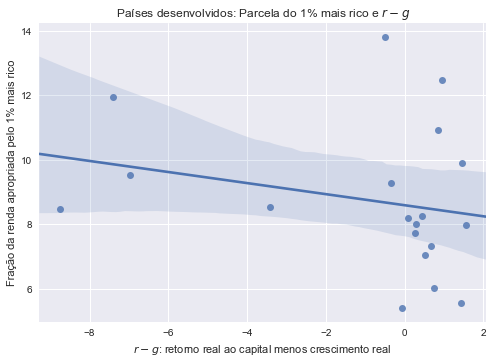

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = sns.regplot(x=media['rg1'], y=media['top1'])
fig.set(xlabel='$r-g$: retorno real ao capital menos crescimento real',
        ylabel='Fração da renda apropriada pelo 1% mais rico',
        title='Países desenvolvidos: Parcela do 1% mais rico e $r-g$')
plt.show()